Menu:
1. Owner
2. Customer
3. Exit
Enter your choice: 1

Owner Menu:
1. Add Product
2. Remove Product
3. Display Products
4. Plot Products
5. Back to Main Menu
Enter your choice: 3
Available Products:
Name: , Category: , Price: , Quantity: 
Name: Apple, Category: Fruits, Price: 12, Quantity: 50
Name: Watermelon, Category: Fruits, Price: 10, Quantity: 60
Name: Muskmelon, Category: Fruits, Price: 10, Quantity: 40
Name: Orange, Category: Fruits, Price: 20, Quantity: 30
Name: Mango, Category: Fruits, Price: 45, Quantity: 30
Name: Grapes, Category: Fruits, Price: 30, Quantity: 55
Name: Banana, Category: Fruits, Price: 30, Quantity: 45
Name: Pineapple, Category: Fruits, Price: 30, Quantity: 20
Name: Strawberry, Category: Fruits, Price: 50, Quantity: 50
Name: Pomegranate, Category: Fruits, Price: 30, Quantity: 50
Name: Avacado, Category: Fruits, Price: 60, Quantity: 30
Name: Pear, Category: Fruits, Price: 40, Quantity: 20
Name: Kiwi, Category: Fruits, Price: 30, Quantity: 30
Name: , Category:

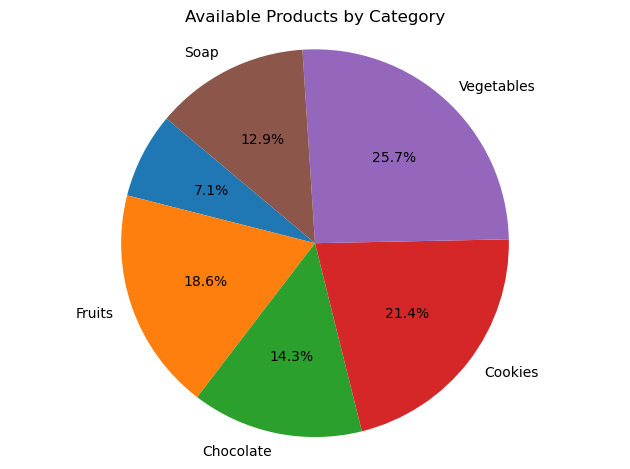


Owner Menu:
1. Add Product
2. Remove Product
3. Display Products
4. Plot Products
5. Back to Main Menu
Enter your choice: 5
Returning to main menu.
Menu:
1. Owner
2. Customer
3. Exit
Enter your choice: 2

Customer Menu:
1. Select Products
2. Exit to Main Menu
Enter your choice: 1
Available Products:
Available Products:
Name: , Category: , Price: , Quantity: 
Name: Apple, Category: Fruits, Price: 12, Quantity: 50
Name: Watermelon, Category: Fruits, Price: 10, Quantity: 60
Name: Muskmelon, Category: Fruits, Price: 10, Quantity: 40
Name: Orange, Category: Fruits, Price: 20, Quantity: 30
Name: Mango, Category: Fruits, Price: 45, Quantity: 30
Name: Grapes, Category: Fruits, Price: 30, Quantity: 55
Name: Banana, Category: Fruits, Price: 30, Quantity: 45
Name: Pineapple, Category: Fruits, Price: 30, Quantity: 20
Name: Strawberry, Category: Fruits, Price: 50, Quantity: 50
Name: Pomegranate, Category: Fruits, Price: 30, Quantity: 50
Name: Avacado, Category: Fruits, Price: 60, Quantity: 30
Name

In [1]:
import csv
import matplotlib.pyplot as plt


# Function to read products from CSV file
def read_products():
    products = []
    with open('products.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            products.append(row)
    return products


# Function to write products to CSV file
def write_products(products):
    with open('products.csv', 'w', newline='') as csvfile:
        fieldnames = ['Name', 'Category', 'Price', 'Quantity']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for product in products:
            # Filter out any extra fields not in fieldnames
            filtered_product = {key: product[key] for key in fieldnames}
            writer.writerow(filtered_product)



# Function for owner to add product
# Function for owner to add product
def add_product(products):
    name = input("Enter product name: ")
    category = input("Enter product category: ")
    
    # Validate price input
    while True:
        price = input("Enter product price: ")
        if price.isdigit() or (price.startswith('-') and price[1:].isdigit()):  # Check if price is a valid number
            break
        else:
            print("Price must be a valid number.")
    
    # Validate quantity input
    while True:
        quantity = input("Enter product quantity: ")
        if quantity.isdigit():  # Check if quantity is a valid integer
            break
        else:
            print("Quantity must be a valid integer.")
    
    # Read existing products from CSV
    existing_products = read_products()
    
    # Create a new product dictionary with only valid fields
    new_product = {'Name': name, 'Category': category, 'Price': price, 'Quantity': quantity}
    valid_product = {key: value for key, value in new_product.items() if key in ['Name', 'Category', 'Price', 'Quantity']}
    
    # Append new product to the list of existing products
    existing_products.append(valid_product)
    
    # Write all products (including the new one) back to the CSV file
    write_products(existing_products)
    
    print("Product added successfully!")



# Function for owner to remove product
def remove_product(products):
    name = input("Enter product name to remove: ")
    for product in products:
        if product['Name'] == name:
            products.remove(product)
            write_products(products)
            print("Product removed successfully!")
            return
    print("Product not found!")

# Function to display available products
def display_products(products):
    print("Available Products:")
    for product in products:
        print(f"Name: {product['Name']}, Category: {product['Category']}, Price: {product['Price']}, Quantity: {product['Quantity']}")

# Function for user to select products and add them to cart
def select_products(products):
    cart = []
    category = input("Enter preferred category (leave blank to view all categories): ")
    for product in products:
        if category.lower() == product['Category'].lower() or category == '':
            print(f"Name: {product['Name']}, Price: {product['Price']}, Quantity available: {product['Quantity']}")
            quantity = int(input("Enter quantity to add to cart (0 to skip): "))
            if quantity > 0 and quantity <= int(product['Quantity']):
                cart.append({'Name': product['Name'], 'Price': product['Price'], 'Quantity': quantity})
                product['Quantity'] = str(int(product['Quantity']) - quantity)
    write_products(products)
    return cart

# Function to calculate total price of items in cart
def calculate_total(cart):
    total_price = sum(float(item['Price']) * int(item['Quantity']) for item in cart)
    return total_price


# Function to plot a pie chart of available products by category
def plot_products(products):
    categories = {}
    for product in products:
        category = product['Category']
        if category in categories:
            categories[category] += 1
        else:
            categories[category] = 1
   
    labels = categories.keys()
    sizes = categories.values()
   
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Available Products by Category')
    plt.tight_layout()
    plt.show()


# Function for user to select products and add them to cart
def select_products(products):
    cart = []
    print("Available Products:")
    display_products(products)  # Display available products
    while True:
        category = input("Enter preferred category (leave blank to view all categories): ")
        product_name = input("Enter product name to add to cart (or type 'done' to finish): ")
        if product_name.lower() == 'done':
            break
        found = False
        for product in products:
            if (category == '' or category.lower() == product['Category'].lower()) and product_name.lower() == product['Name'].lower():
                print(f"Price: {product['Price']}, Quantity available: {product['Quantity']}")
                quantity = int(input("Enter quantity to add to cart (0 to skip): "))
                if quantity > 0 and quantity <= int(product['Quantity']):
                    cart.append({'Name': product['Name'], 'Price': product['Price'], 'Quantity': quantity})
                    product['Quantity'] = str(int(product['Quantity']) - quantity)
                    found = True
                    break
                else:
                    print("Invalid quantity or not enough stock.")
        if not found:
            print("Product not found or category mismatch.")
    write_products(products)  # Write updated product quantities back to CSV
    return cart

# Main function
def main():
    products = read_products()  # Read products initially
    while True:
        print("Menu:")
        print("1. Owner")
        print("2. Customer")
        print("3. Exit")
        
        user_choice = input("Enter your choice: ")
        
        if user_choice == '1':
            owner_menu(products)  # Pass products to owner menu
        elif user_choice == '2':
            customer_menu(products)  # Pass products to customer menu
        elif user_choice == '3':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please enter a valid option.")

# Owner menu
def owner_menu(products):
    while True:
        print("\nOwner Menu:")
        print("1. Add Product")
        print("2. Remove Product")
        print("3. Display Products")
        print("4. Plot Products")
        print("5. Back to Main Menu")
        
        action = input("Enter your choice: ")
        
        if action == '1':
            add_product(products)
        elif action == '2':
            remove_product(products)
        elif action == '3':
            display_products(products)
        elif action == '4':
            plot_products(products)
        elif action == '5':
            print("Returning to main menu.")
            break
        else:
            print("Invalid action. Please enter a valid option.")

# Customer menu
def customer_menu(products):
    while True:
        print("\nCustomer Menu:")
        print("1. Select Products")
        print("2. Exit to Main Menu")
        
        action = input("Enter your choice: ")
        
        if action == '1':
            cart = select_products(products)
            total_price = calculate_total(cart)
            print("Items added to cart successfully!")
            print("Cart:")
            for item in cart:
                print(f"Product: {item['Name']}, Quantity: {item['Quantity']}, Price: {item['Price']}")
            print(f"Total Price: ${total_price}")
        elif action == '2':
            print("Returning to main menu.")
            break
        else:
            print("Invalid action. Please enter a valid option.")

# Rest of your code...

if __name__ == "__main__":
    main()
